<a href="https://colab.research.google.com/github/HarshineeRoopakula/Machine-Learning/blob/main/Supervised%20Learning/kNN%2BConfusion%20Matrix%2B%20IRIS%20Dataset%20%2B%20Colab/iris_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Uploading the data file

In [2]:
from google.colab import files
uploaded  = files.upload()

import io
iris = pd.read_csv(io.BytesIO(uploaded['iris.csv']),names=["Sepal length", "Sepal width", "Petal length", "Petal width", "species"])

Saving iris.csv to iris.csv


# Describing the data 

In [3]:
# Number of rows and columns of the data
iris.shape

(150, 5)

In [4]:
# Printing the column names and data type of the columns 
col_list = iris.columns
print(type(col_list))
print(col_list[:])

<class 'pandas.core.indexes.base.Index'>
Index(['Sepal length', 'Sepal width', 'Petal length', 'Petal width',
       'species'],
      dtype='object')


In [5]:
# Printing each class count. 
iris['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [6]:
# select all the rows and col indices 0 to 3 (Selecting X value) and printing the shape of the data
iris_data = iris.iloc[:,0:4] 
iris_data.shape

(150, 4)

In [7]:
# Printing the head (top 2 data)
iris_data.head(2)

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [8]:
# select all the rows and 4th column (Selecting the Y value) and printing the shape of the data
iris_lables = iris.iloc[:,4:] 
iris_lables.shape

(150, 1)

In [9]:
# Printing the head (top 2 data)
iris_lables.head(2)

,species
0,Iris-setosa
1,Iris-setosa


# Data Standardization

In [10]:
#Standardizing the data using sklearn pre-processing
iris_standard = StandardScaler().fit_transform(iris_data)  # this has transformed dataframe to numpy N-dimensional array,
#each row in df is a list we will have n inner lists in a outer list,thats why length of iris_standard is 150 and 
#length of each inner list is 4.
print('length of iris_standard is ',len(iris_standard))
print('length of inner list is',len(iris_standard[0]))
print('sample elements are')
print((iris_standard[0:3]))

length of iris_standard is  150
length of inner list is 4
sample elements are
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]]


# Splitting the data for training and testing

In [11]:
#splitting dataset into train and test
iris_lables_np = iris_lables.values.reshape(1,150)
x_train, x_test, y_train, y_test = train_test_split(iris_standard, iris_lables_np[0], test_size=0.33, random_state=42)
print(x_test[0:2],y_test[0:2])
print(len(x_test),len(y_test))
print(len(x_train),len(y_train))


[[ 0.31099753 -0.58776353  0.53529583  0.00175297]
 [-0.17367395  1.72626612 -1.17067529 -1.18150376]] ['Iris-versicolor' 'Iris-setosa']
50 50
100 100


# Model Training on Standardizied data 

In [12]:
#Training using kNN Classifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Model Prediction

In [13]:
#Predicting
predict_array = neigh.predict(x_test)
print("Accuracy Score =",metrics.accuracy_score(y_test, predict_array))

for i in range(len(predict_array)):
   if (predict_array[i] != y_test[i]):
       print('actual is {} but predicted is {}'.format(y_test[i],predict_array[i]))
       print('Wrong')
        

Accuracy Score = 0.98
actual is Iris-virginica but predicted is Iris-versicolor
Wrong


# Model training and prediction on non-standardized data

In [14]:
#prediction on non standardized data
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_lables_np[0], test_size=0.33, random_state=42)
neigh2 = KNeighborsClassifier(n_neighbors=5)
neigh2.fit(x_train, y_train) 
predict_array = neigh2.predict(x_test)
print(metrics.accuracy_score(y_test, predict_array))

0.98


# Cross validation using 10 folds and for different K values

In [15]:
#cross validation using 10 folds,cv=10

k_list= [1,3,5,7,9]
cv_scores=[]

for i in k_list:
    cross_neigh = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(cross_neigh,x_train, y_train,cv=10)
    cv_scores.append(np.mean(scores))

print(len(cv_scores))
print(cv_scores)

cv_score_zip=zip(k_list,cv_scores)

for i in cv_score_zip:
    print(i)

5
[0.9400000000000001, 0.9400000000000001, 0.9400000000000001, 0.9400000000000001, 0.9400000000000001]
(1, 0.9400000000000001)
(3, 0.9400000000000001)
(5, 0.9400000000000001)
(7, 0.9400000000000001)
(9, 0.9400000000000001)


# Plotting K-value vs cv_score

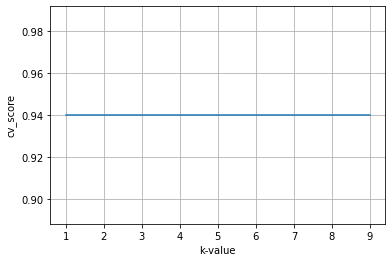

In [16]:
#plot for K-value and accuracy using 10 fold cv.
plt.figure('Iris_KNN')
plt.xlabel('k-value')
plt.ylabel('cv_score')
plt.grid()
plt.plot(k_list,cv_scores)
plt.show()

# Predicting Test dataset and see Accuracy

In [17]:
# based on above observations we are getting maximum accuracy when k=1,
#So we will use K-value 1 and predict on test dataset and see accuracy.

neigh_K1 = KNeighborsClassifier(n_neighbors=1)
neigh_K1.fit(x_train, y_train)
predict_array_k1 = neigh_K1.predict(x_test)
print(metrics.accuracy_score(y_test, predict_array_k1))
predict_probability = neigh_K1.predict_proba(x_test)

cross_predict = cross_val_predict(cross_neigh,x_test,y_test,cv=10)
print(metrics.accuracy_score(y_test, cross_predict))

0.98
0.96


# Metrics Evaluation (Confusion Matrix, Classification Report)

In [18]:
#confusion matrix and classification_report
#precision = TP/TP+FP
#Recall = TP/TP+FN

print(metrics.confusion_matrix(y_test, cross_predict))
print(metrics.classification_report(y_test, cross_predict))

[[19  0  0]
 [ 0 15  0]
 [ 0  2 14]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.88      0.93        16

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50

